## Create the network with same structure
1. Create a simple network
2. Give a class build initial network 

Parameters:
 - `base_graph` Copy the network structure from the base graph
 - `concept` Give the concept holding in this graph
 - `threshold` Init_threshold for first iteration.
 - `number` Seed node number generated randomly
 
Return:
 - `modle` For further iteration
 - `graph` For extrecting and modifying the attribuate in every node or edges.
 
Things need modifying:
 - `initial_set` need to be move out og this class and build independent class for more algorithm
 

In [65]:
import random
import networkx as nx
import matplotlib.pyplot as plt
import ndlib.models.epidemics as ep
import ndlib.models.ModelConfig as mc


# Randomly create the base graph
base_graph = nx.fast_gnp_random_graph(n=10, p=0.8)

def update_concept(g, concept_name, node_list):
    for n in g.nodes():
        if n in node_list:
            nx.set_node_attributes(g, {n: True}, name=concept_name)

def model_init(base_graph, concept, threshold, number):
    # Create graph by copying the base graph
    g = base_graph.copy()

    # Initialize the concept attribute to each node in graph
    concept_attribute = False
    nx.set_node_attributes(g, concept_attribute, name=concept)

    # Model selection
    model = ep.IndependentCascadesModel(g)

    # Model Configuration
    config = mc.Configuration()

    # Setting the edge parameters in the model config
    for e in g.edges():
        config.add_edge_configuration("threshold", e, threshold)
        g[e[0]][e[1]]["threshold"] = threshold

    # Generate a random initial set of nodes
    num_initial_nodes = number 
    nodes_list = list(g.nodes())
    initial_set = random.sample(nodes_list, num_initial_nodes)
    print("Initial seed set randomly generated as:", initial_set)
    
    update_concept(g, concept, initial_set)    
        
    # Set the status of initial set of nodes as infected in the model config
    config.add_model_initial_configuration("Infected", initial_set)

    # Using config, initialize the IC model
    model.set_initial_status(config)

    # The first iteration will generate the initialization and add all settings in config to the graph
    iterations = model.iteration_bunch(1)
    print(iterations)

    return model, g, initial_set


In [66]:
'''
# Create graph by copying the base graph
g1 = base_graph.copy()

# Add the concept1 attribute to each node in graph1
concept1_attribute = False
nx.set_node_attributes(g1, concept1_attribute, name='concept1')

# Create graph2 by copying the base graph
g2 = base_graph.copy()

# Add the concept2 attribute to each node in graph2
concept2_attribute = False
nx.set_node_attributes(g2, concept2_attribute, name='concept2')

# Access and print the concept attribute of the node
print("Concept statue for node 1 in graph_1 is:", g1.nodes[1]['concept1'])
print(g1.nodes(data=True))
print(g2.nodes(data=True))
print(g1.edges())
print(g2.edges())

# Draw these two graphs
nx.draw(g1, node_color='blue', node_size=5)
nx.draw(g2, node_color='green', node_size=5)
'''

effected_node = []

In [118]:
model_1, g_1, initial_set_1 = model_init(base_graph, "cat", 0.5, 2)

Initial seed set randomly generated as: [2, 4]
1
1
[{'iteration': 0, 'status': {0: 0, 1: 0, 2: 1, 3: 0, 4: 1, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}, 'node_count': {0: 8, 1: 2, 2: 0}, 'status_delta': {0: 0, 1: 0, 2: 0}}]


[(0, {'cat': False}), (1, {'cat': False}), (2, {'cat': True}), (3, {'cat': False}), (4, {'cat': True}), (5, {'cat': False}), (6, {'cat': False}), (7, {'cat': False}), (8, {'cat': False}), (9, {'cat': False})]
[(0, 2, {'threshold': 0.5}), (0, 3, {'threshold': 0.5}), (0, 4, {'threshold': 0.5}), (0, 5, {'threshold': 0.5}), (0, 6, {'threshold': 0.5}), (0, 8, {'threshold': 0.5}), (0, 9, {'threshold': 0.5}), (1, 2, {'threshold': 0.5}), (1, 3, {'threshold': 0.5}), (1, 6, {'threshold': 0.5}), (1, 7, {'threshold': 0.5}), (1, 8, {'threshold': 0.5}), (1, 9, {'threshold': 0.5}), (2, 3, {'threshold': 0.5}), (2, 4, {'threshold': 0.5}), (2, 5, {'threshold': 0.5}), (2, 7, {'threshold': 0.5}), (2, 8, {'threshold': 0.5}), (2, 9, {'threshold': 0.5}), (3, 4, {'threshold': 0.5}), (3, 6, {'threshold': 0.5}), (3, 7, {'threshold': 0.5}), (3, 8, {'threshold': 0.5}), (3, 9, {'threshold': 0.5}), (4, 5, {'threshold': 0.5}), (4, 6, {'threshold': 0.5}), (4, 7, {'threshold': 0.5}), (4, 8, {'threshold': 0.5}), (4, 9,

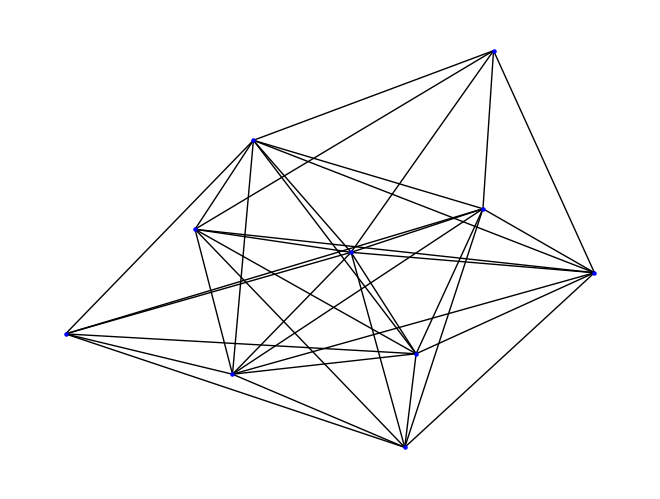

In [119]:
nx.draw(g_1, node_color='blue', node_size=5)
print(g_1.nodes(data=True))
print(g_1.edges(data=True))

In [115]:
def iterations_with_updating(times, model, graph):
    for i in range(times):
        iterations = model.iteration_bunch(1)
        activate_node = []
        inactivated_node = []
        for i, iteration in enumerate(iterations):
            print(iteration)
            for node ,statu in iteration["status"].items():
                if statu == 1:
                    activate_node.append(node)
                elif statu == 2:
                    inactivated_node.append(node)
                    effected_node.append(node)
            update_concept(graph, next(iter(graph.nodes(data=True)[0])), activate_node)
            print(activate_node)
            print(inactivated_node)


In [120]:
iterations_with_updating(2, model_1, g_1)

{'iteration': 1, 'status': {2: 2, 3: 1, 4: 2, 6: 1, 7: 1, 8: 1}, 'node_count': {0: 4, 1: 4, 2: 2}, 'status_delta': {0: -4, 1: 2, 2: 2}}
1
1
1
1
[3, 6, 7, 8]
[2, 4]
{'iteration': 2, 'status': {0: 1, 1: 1, 3: 2, 6: 2, 7: 2, 8: 2, 9: 1}, 'node_count': {0: 1, 1: 3, 2: 6}, 'status_delta': {0: -3, 1: -1, 2: 4}}
1
1
1
[0, 1, 9]
[3, 6, 7, 8]


In [121]:
print(g_1.nodes(data=True))

[(0, {'cat': True}), (1, {'cat': True}), (2, {'cat': True}), (3, {'cat': True}), (4, {'cat': True}), (5, {'cat': False}), (6, {'cat': True}), (7, {'cat': True}), (8, {'cat': True}), (9, {'cat': True})]


## Add concept and it's status 

In [3]:
def model_init(threshold, number):
    # Model selection
    model = ep.IndependentCascadesModel(g1)

    # Model Configuration
    config = mc.Configuration()

    # Setting the edge parameters
    threshold = threshold
    for e in g1.edges():
        config.add_edge_configuration("threshold", e, threshold)


    # Generate a random initial set of nodes
    num_initial_nodes = number  # Replace with the desired number of initial nodes
    nodes_list = list(g1.nodes())
    initial_set = random.sample(nodes_list, num_initial_nodes)

    print("Initial seed set randomy generated as:",initial_set)

    config.add_model_initial_configuration("Infected", initial_set)
    model.set_initial_status(config)

    effected_node = []

Initial seed set randomy generated as: [0, 3]


In [4]:
iterations = model.iteration_bunch(1)

print(g1.edges(data=True))
threshold = 0.02

for e in g1.edges():
    g1[e[0]][e[1]]["threshold"] = threshold

[(0, 1, {}), (0, 2, {}), (0, 5, {}), (0, 6, {}), (0, 7, {}), (0, 8, {}), (0, 9, {}), (1, 2, {}), (1, 4, {}), (1, 5, {}), (1, 6, {}), (1, 7, {}), (1, 8, {}), (1, 9, {}), (2, 3, {}), (2, 4, {}), (2, 5, {}), (2, 7, {}), (2, 8, {}), (2, 9, {}), (3, 4, {}), (3, 5, {}), (3, 6, {}), (3, 8, {}), (3, 9, {}), (4, 5, {}), (4, 7, {}), (4, 8, {}), (4, 9, {}), (5, 6, {}), (5, 8, {}), (5, 9, {}), (6, 7, {}), (6, 8, {}), (6, 9, {}), (7, 8, {}), (8, 9, {})]


In [5]:
print(iterations)
print(g1.edges(data=True))

[{'iteration': 0, 'status': {0: 1, 1: 0, 2: 0, 3: 1, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}, 'node_count': {0: 8, 1: 2, 2: 0}, 'status_delta': {0: 0, 1: 0, 2: 0}}]
[(0, 1, {'threshold': 0.02}), (0, 2, {'threshold': 0.02}), (0, 5, {'threshold': 0.02}), (0, 6, {'threshold': 0.02}), (0, 7, {'threshold': 0.02}), (0, 8, {'threshold': 0.02}), (0, 9, {'threshold': 0.02}), (1, 2, {'threshold': 0.02}), (1, 4, {'threshold': 0.02}), (1, 5, {'threshold': 0.02}), (1, 6, {'threshold': 0.02}), (1, 7, {'threshold': 0.02}), (1, 8, {'threshold': 0.02}), (1, 9, {'threshold': 0.02}), (2, 3, {'threshold': 0.02}), (2, 4, {'threshold': 0.02}), (2, 5, {'threshold': 0.02}), (2, 7, {'threshold': 0.02}), (2, 8, {'threshold': 0.02}), (2, 9, {'threshold': 0.02}), (3, 4, {'threshold': 0.02}), (3, 5, {'threshold': 0.02}), (3, 6, {'threshold': 0.02}), (3, 8, {'threshold': 0.02}), (3, 9, {'threshold': 0.02}), (4, 5, {'threshold': 0.02}), (4, 7, {'threshold': 0.02}), (4, 8, {'threshold': 0.02}), (4, 9, {'threshold': 0.02}

## Parallel spreading in the IC mode with two network with same structure

In [ ]:
iterations = model.iteration_bunch(1) 

In [ ]:
import multiprocessing as mp

def spread_simulation(graph, initial_node):
    

    return spreading_result

def run_spreading_simulation(graph, initial_node):
    # Run a single spreading simulation for a given source node
    result = spread_simulation(graph, initial_node)
    return result

def parallel_spreading_simulation(graph, initial_nodes, num_processes):
    # Create a multiprocessing Pool with the desired number of processes
    pool = mp.Pool(num_processes)

    # Generate the arguments for each spreading simulation
    arguments = [(graph, node) for node in initial_nodes]

    # Run spreading simulations in parallel
    results = pool.starmap(run_spreading_simulation, arguments)

    # Close the pool to free resources
    pool.close()
    pool.join()

    return results